In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("rotterdam_hamburg.csv", on_bad_lines="warn", dtype={'Draught': str})
pd.options.display.max_columns = None
pd.set_option("display.max_rows", 15)
df.head()

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,StartPort,EndPort,ID,time,shiptype,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,Destination,Name,Callsign,AisSourcen
0,27811,477829700,51.95,4.03,'2016-01-24 12:50',53.5,9.93,'2016-01-25 13:00',ROTTERDAM,HAMBURG,43792697,'2016-01-24 12:50',71,323,43,12,51.95,4.03,0.3,5.0,87,HAMBURG,OOCL.SOUTHAMPTON,VRCU7,H7001
1,27811,477829700,51.95,4.03,'2016-01-24 12:50',53.5,9.93,'2016-01-25 13:00',ROTTERDAM,HAMBURG,43793531,'2016-01-24 12:51',71,323,43,12,51.95,4.03,0.4,8.0,87,HAMBURG,OOCL.SOUTHAMPTON,VRCU7,H7001
2,27811,477829700,51.95,4.03,'2016-01-24 12:50',53.5,9.93,'2016-01-25 13:00',ROTTERDAM,HAMBURG,43794915,'2016-01-24 12:52',71,323,43,12,51.95,4.03,0.5,11.0,86,HAMBURG,OOCL.SOUTHAMPTON,VRCU7,H7001
3,27811,477829700,51.95,4.03,'2016-01-24 12:50',53.5,9.93,'2016-01-25 13:00',ROTTERDAM,HAMBURG,43795380,'2016-01-24 12:53',71,323,43,12,51.95,4.03,0.5,12.0,85,HAMBURG,OOCL.SOUTHAMPTON,VRCU7,H7001
4,27811,477829700,51.95,4.03,'2016-01-24 12:50',53.5,9.93,'2016-01-25 13:00',ROTTERDAM,HAMBURG,43797027,'2016-01-24 12:54',71,323,43,12,51.95,4.03,0.5,19.0,84,HAMBURG,OOCL.SOUTHAMPTON,VRCU7,H7001


In [31]:
num_rows = len(df)
static_columns = ["TripID", "MMSI", "StartLatitude", "StartLongitude", "StartTime", "EndLatitude", "EndLongitude", "EndTime",
                  "StartPort", "EndPort", "shiptype", "Length", "Breadth", "Draught", "Destination", "Name", "Callsign", "AisSourcen"]
dynamic_columns = ["ID", "time", "Latitude", "Longitude", "SOG", "COG", "TH"]
print("Rows:", num_rows)

Rows: 500142


## Delete duplicate rows


The reason for the number not matching up perfectly is, that some rows are duplicated multiple times

The amount of deleted rows is 38651/2 = 19325 if every row is only duplicated once

But the actual amount of deleted rows is 500142 - 476226 = 23916

So that means that there are rows that are duplicated several times for these numbers to make sense

In [32]:
df_no_duplicates = df.drop_duplicates()
print("Original lenght:", len(df))
print("With no duplicates lenght:", len(df_no_duplicates))
print("Duplicated rows amount:", df.duplicated(keep=False).sum())
print("Distribution of ID for duplicated rows:", df[df.duplicated(keep=False)]["ID"].value_counts())


Original lenght: 500142
With no duplicates lenght: 476226
Duplicated rows amount: 38651
Distribution of ID for duplicated rows: ID
473888842    9
472145690    9
472268923    9
472149494    9
472209039    9
            ..
469013884    3
468881845    3
469012198    3
468665172    3
468783709    3
Name: count, Length: 9568, dtype: int64


## Explore Data

We first get an overview over the distribution of the values in each column

In [33]:
for column_name in df.columns:
    print("Amount of :", df_no_duplicates[column_name].value_counts(), "\n")

Amount of : TripID
495113     2461
315378     1638
564753     1455
564754     1455
1205885    1441
           ... 
642350      341
359637      338
82417       323
175607      309
708112      294
Name: count, Length: 439, dtype: int64 

Amount of : MMSI
212357000    13355
304159000    10905
209777000    10810
304158000    10211
210716000     8607
             ...  
477222700      452
477712400      451
477261300      424
413073000      376
636016417      341
Name: count, Length: 185, dtype: int64 

Amount of : StartLatitude
51.95    157084
51.94     85269
51.89     78979
51.96     46375
51.88     43575
          ...  
52.07      1114
51.93      1070
52.05       988
52.04       696
52.01       424
Name: count, Length: 17, dtype: int64 

Amount of : StartLongitude
4.06    99153
4.43    59210
4.05    48866
3.99    39080
4.42    36560
        ...  
3.89      981
4.30      970
3.90      928
4.31      890
4.12      483
Name: count, Length: 32, dtype: int64 

Amount of : StartTime
'2016-08-25 

We find that there are no missing values

In [34]:
print("Missing values:\n", df_no_duplicates.isna().sum())

Missing values:
 TripID            0
MMSI              0
StartLatitude     0
StartLongitude    0
StartTime         0
                 ..
TH                0
Destination       0
Name              0
Callsign          0
AisSourcen        0
Length: 25, dtype: int64


## Reality check

We want to want to check whether the data given is physically possible or not
We consider:
- position --> Is the position of the ship within reasonable locations of the trip from Rotterdam to Hamburg
    - Yes, we cannot visualy detect any outliers
- time --> Is the start time and end time reasonable
    - Yes, here aswell there are not any outliers detectable

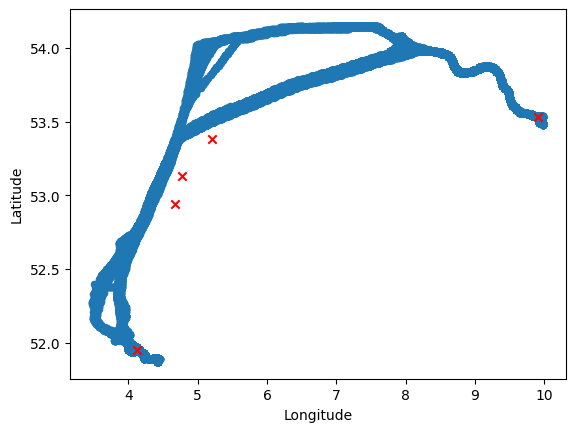

In [35]:
ax = df_no_duplicates.plot(x="Longitude", y="Latitude", kind="scatter", marker="o")

ax.scatter(x=[9.91, 4.13, 5.21, 4.67, 4.77],y=[53.53, 51.95, 53.38,52.94, 53.13], marker="x", color="red") # Rotterdam Port, Hamburg Port and land in the area
plt.show()

/tmp/ipykernel_364780/3500821834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates["StartTime"] = pd.to_datetime(df_no_duplicates["StartTime"])
/tmp/ipykernel_364780/3500821834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates["EndTime"] = pd.to_datetime(df_no_duplicates["EndTime"])


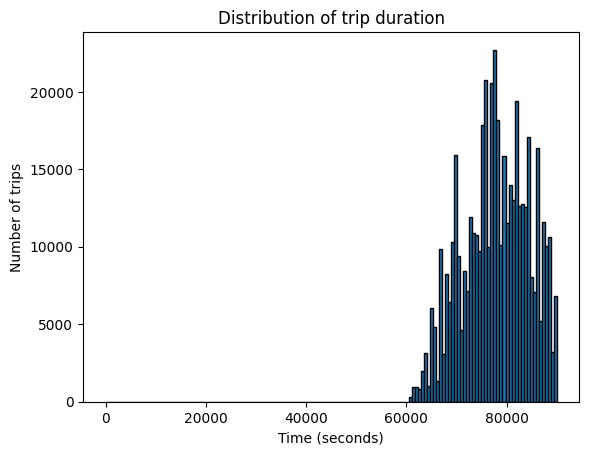

In [36]:
df_no_duplicates["StartTime"] = pd.to_datetime(df_no_duplicates["StartTime"])
df_no_duplicates["EndTime"] = pd.to_datetime(df_no_duplicates["EndTime"])

time_difference = df_no_duplicates["EndTime"] - df_no_duplicates["StartTime"]
time_difference_seconds = time_difference.dt.total_seconds()

# Plot the distribution as a bar graph
bins = range(0, int(time_difference_seconds.max()) + 600, 600)  # 600 seconds = 10 minutes
plt.hist(time_difference_seconds, bins=bins, edgecolor='black')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of trips')
plt.title('Distribution of trip duration')
plt.show()

## Fix missing values

Although there are no missing values detected by the .isna function the missing values here are denoted with a "?"

We can see that missing data is in following columns: Draught, Destination, Name, Callsign, AisSourcen

In [37]:
for column in df_no_duplicates.columns:
    print("Amount of ? in ", column, df_no_duplicates[column].astype(str).str.count("\?").sum())

Amount of ? in  TripID 0
Amount of ? in  MMSI 0
Amount of ? in  StartLatitude 0
Amount of ? in  StartLongitude 0
Amount of ? in  StartTime 0
Amount of ? in  EndLatitude 0
Amount of ? in  EndLongitude 0
Amount of ? in  EndTime 0
Amount of ? in  StartPort 0
Amount of ? in  EndPort 0
Amount of ? in  ID 0
Amount of ? in  time 0
Amount of ? in  shiptype 0
Amount of ? in  Length 0
Amount of ? in  Breadth 0
Amount of ? in  Draught 7880
Amount of ? in  Latitude 0
Amount of ? in  Longitude 0
Amount of ? in  SOG 0
Amount of ? in  COG 0
Amount of ? in  TH 0
Amount of ? in  Destination 1989
Amount of ? in  Name 1966
Amount of ? in  Callsign 1989
Amount of ? in  AisSourcen 14262


Here we replace all the missing values with the most occoring entry in the trip, since the columns where missing data is are all static.
We couldn't apply the same technique to the columns Draught and AisSourcen, since in the trips where the data is missing, besides ? there is no further data to fill up the missing data.

==> To fix this we would either need to interpolate from other attributes, which is complicated or get the information online

For now I will delete these columns because they don't seem very relevant for the ML code

In [38]:
def checkForNotFillableEntries(column): #Check wether the data is fillable with existing data
    entriesNotFillable = 0
    for tripId in df_no_duplicates["TripID"].unique():
        tripSelectedColumn = df_no_duplicates.loc[df_no_duplicates["TripID"] == tripId, column]
        if tripSelectedColumn.value_counts().idxmax() == "?" and len(tripSelectedColumn.value_counts()) == 1:
            entriesNotFillable += len(tripSelectedColumn)
    return entriesNotFillable

print(checkForNotFillableEntries("Destination"))
print(checkForNotFillableEntries("Name"))
print(checkForNotFillableEntries("Callsign"))
print(checkForNotFillableEntries("AisSourcen"))
print(checkForNotFillableEntries("Draught"))


0
0
0
12592
7880


In [39]:
def replaceMissing(column): #Filling the columns with data where it is possible
    for tripId in df_no_duplicates["TripID"].unique():
        tripSelectedColumn = df_no_duplicates.loc[df_no_duplicates["TripID"] == tripId, column]
        if tripSelectedColumn.value_counts().idxmax() == "?" and len(tripSelectedColumn.value_counts()) > 1:
            new_value = tripSelectedColumn.value_counts().sort_values(ascending=False).index[1]
        else:
            new_value = tripSelectedColumn.value_counts().idxmax()

        df_no_duplicates.loc[df_no_duplicates["TripID"] == tripId, column] = new_value

replaceMissing("Destination")
replaceMissing("Callsign")
replaceMissing("Name")

for column in static_columns:
    print("? in ", column, df_no_duplicates[column].astype(str).str.count("\?").sum())

? in  TripID 0
? in  MMSI 0
? in  StartLatitude 0
? in  StartLongitude 0
? in  StartTime 0
? in  EndLatitude 0
? in  EndLongitude 0
? in  EndTime 0
? in  StartPort 0
? in  EndPort 0
? in  shiptype 0
? in  Length 0
? in  Breadth 0
? in  Draught 7880
? in  Destination 0
? in  Name 0
? in  Callsign 0
? in  AisSourcen 14262


In [40]:
df_no_duplicates.drop(columns=["Draught", "AisSourcen"], inplace=True)  #deleting the columns where it is not possible
df_no_duplicates.head()

/tmp/ipykernel_364780/1018143129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates.drop(columns=["Draught", "AisSourcen"], inplace=True)  #deleting the columns where it is not possible


,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,StartPort,EndPort,ID,time,shiptype,Length,Breadth,Latitude,Longitude,SOG,COG,TH,Destination,Name,Callsign
0,27811,477829700,51.95,4.03,2016-01-24 12:50:00,53.5,9.93,2016-01-25 13:00:00,ROTTERDAM,HAMBURG,43792697,'2016-01-24 12:50',71,323,43,51.95,4.03,0.3,5.0,87,HAMBURG,OOCL.SOUTHAMPTON,VRCU7
1,27811,477829700,51.95,4.03,2016-01-24 12:50:00,53.5,9.93,2016-01-25 13:00:00,ROTTERDAM,HAMBURG,43793531,'2016-01-24 12:51',71,323,43,51.95,4.03,0.4,8.0,87,HAMBURG,OOCL.SOUTHAMPTON,VRCU7
2,27811,477829700,51.95,4.03,2016-01-24 12:50:00,53.5,9.93,2016-01-25 13:00:00,ROTTERDAM,HAMBURG,43794915,'2016-01-24 12:52',71,323,43,51.95,4.03,0.5,11.0,86,HAMBURG,OOCL.SOUTHAMPTON,VRCU7
3,27811,477829700,51.95,4.03,2016-01-24 12:50:00,53.5,9.93,2016-01-25 13:00:00,ROTTERDAM,HAMBURG,43795380,'2016-01-24 12:53',71,323,43,51.95,4.03,0.5,12.0,85,HAMBURG,OOCL.SOUTHAMPTON,VRCU7
4,27811,477829700,51.95,4.03,2016-01-24 12:50:00,53.5,9.93,2016-01-25 13:00:00,ROTTERDAM,HAMBURG,43797027,'2016-01-24 12:54',71,323,43,51.95,4.03,0.5,19.0,84,HAMBURG,OOCL.SOUTHAMPTON,VRCU7


### Here we check for entries with 0
There is no relevant column where entries are 0 so we leave it at that

In [41]:
for column in [i for i in static_columns if (i != "Draught" and i != "AisSourcen")]:
    print("0 in ", column, df_no_duplicates[column].astype(str).str.contains( r'^0$', regex=True).sum())

0 in  TripID 0
0 in  MMSI 0
0 in  StartLatitude 0
0 in  StartLongitude 0
0 in  StartTime 0
0 in  EndLatitude 0
0 in  EndLongitude 0
0 in  EndTime 0
0 in  StartPort 0
0 in  EndPort 0
0 in  shiptype 1989
0 in  Length 2559
0 in  Breadth 2559
0 in  Destination 0
0 in  Name 0
0 in  Callsign 0


## Standardize Destination

We know that all the ships are going to go to Hamburg, therefore we can standardize the destination place, since there are a lot of different formats

In [42]:
df_no_duplicates.loc[: , "Destination"] = "HAMBURG"
print(df_no_duplicates["Destination"].value_counts())

Destination
HAMBURG    476226
Name: count, dtype: int64


## Add new features

Here we added some new features that could be interesting for further analysis such as:

1. pastTravelTime: describes the already traveled time in seconds
2. timeTillArrival: describes the time until the vessel reaches its destination, this is also our target feature

In [43]:
df_no_duplicates.insert(0, "pastTravelTime",(pd.to_datetime(df_no_duplicates["time"]) - pd.to_datetime(df_no_duplicates["StartTime"])).dt.total_seconds())
df_no_duplicates.insert(0, "timeTillArrival", (pd.to_datetime(df_no_duplicates["EndTime"]) - pd.to_datetime(df_no_duplicates["time"])).dt.total_seconds())

## Delete extremes
Here we try to eliminate the extremes of the normal distribution seen in the graph, by cutting off trips, that are either very short or very long

/tmp/ipykernel_364780/349960461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates["StartTime"] = pd.to_datetime(df_no_duplicates["StartTime"])
/tmp/ipykernel_364780/349960461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates["EndTime"] = pd.to_datetime(df_no_duplicates["EndTime"])


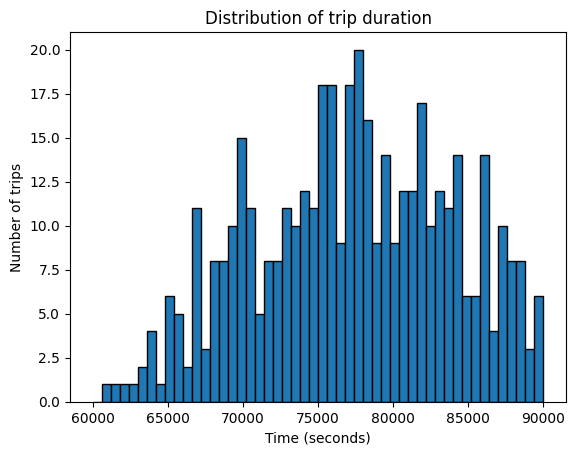

In [44]:
df_no_duplicates["StartTime"] = pd.to_datetime(df_no_duplicates["StartTime"])
df_no_duplicates["EndTime"] = pd.to_datetime(df_no_duplicates["EndTime"])
df_unique_trips = df_no_duplicates.drop_duplicates(subset='TripID', keep='first')

time_difference = df_unique_trips["EndTime"] - df_unique_trips["StartTime"]
time_difference_seconds = time_difference.dt.total_seconds()

# Plot the distribution as a bar graph
bins = range(60000, int(time_difference_seconds.max()) + 600, 600)  # 600 seconds = 10 minutes
plt.hist(time_difference_seconds, bins=bins, edgecolor='black')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of trips')
plt.title('Distribution of trip duration')
plt.show()

In [56]:
time_difference_seconds_all = (df_no_duplicates["EndTime"] - df_no_duplicates["StartTime"]).dt.total_seconds()
df_no_duplicates = df_no_duplicates[(time_difference_seconds_all > 65000) & (time_difference_seconds_all < 87500) ]